In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams["figure.figsize"] = 7,8 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
!pip install heatmapz

In [3]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

In [4]:
# Load the Automobile dataset.
# This gets a cleaned version of UCI dataset found at http://archive.ics.uci.edu/ml/datasets/automobile

data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')

## Correlation matrix plot

Let's create a correlation matrix plot using all numerical columns from the dataset


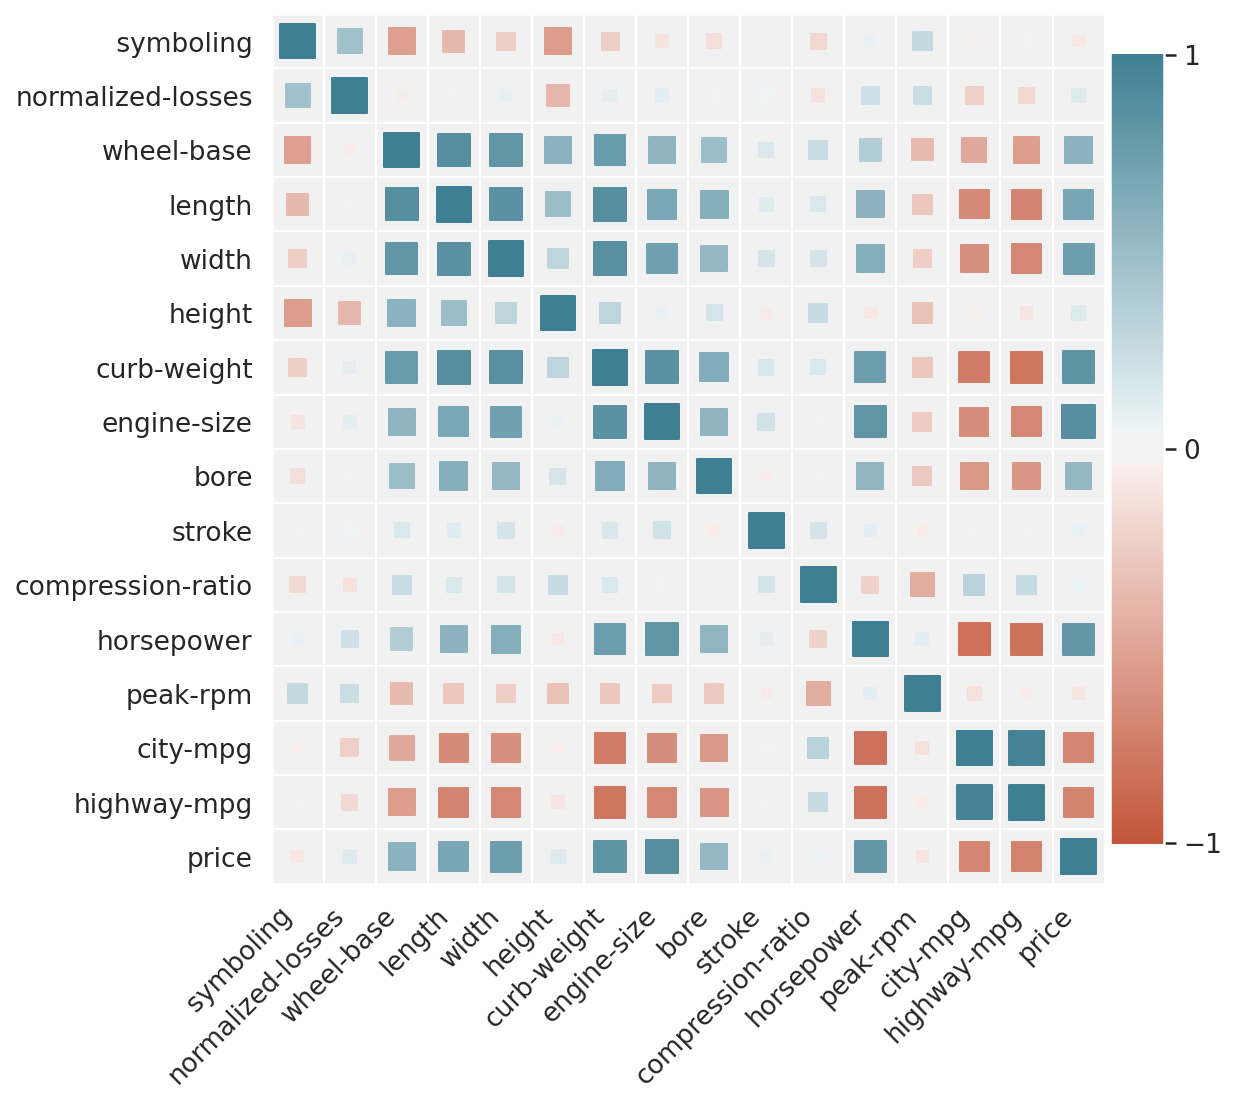

In [5]:
plt.figure(figsize=(8,8))
corrplot(data.corr(), size_scale=300);


## Discrete joint distribution

Let’s see how the cars in our data set are distributed according to horsepower and drivetrain layout. That is, we want to visualize the following table

|  horsepower ↓ \ drive-wheels → | 4wd | fwd | rwd |
|-------------------------------|-----|-----|-----|
|  Low (0-100)                  | 5   | 89  | 15  |
| Medium (100-150)              | 3   | 24  | 35  |
| High (150+)                   | 0   | 5   | 25  |


First we calculate the counts per groups, to get values corresponding to the table above


In [7]:
data["cnt"] = np.ones(len(data))
bin_labels = ["Low (0-100)", "Medium (100-150)", "High (150+)"]

data["horsepower-group"] = pd.cut(data["horsepower"], [0, 100, 150, data["horsepower"].max()], labels=bin_labels)
g = data.groupby(["horsepower-group", "drive-wheels"]).count()[["cnt"]].replace(np.nan, 0).reset_index()
display(g)

,horsepower-group,drive-wheels,cnt
0,Low (0-100),4wd,5.0
1,Low (0-100),fwd,89.0
2,Low (0-100),rwd,15.0
3,Medium (100-150),4wd,3.0
4,Medium (100-150),fwd,24.0
5,Medium (100-150),rwd,35.0
6,High (150+),4wd,0.0
7,High (150+),fwd,5.0
8,High (150+),rwd,25.0


Then we can use the `heatmap` function to create a heatmap representing our distribution.

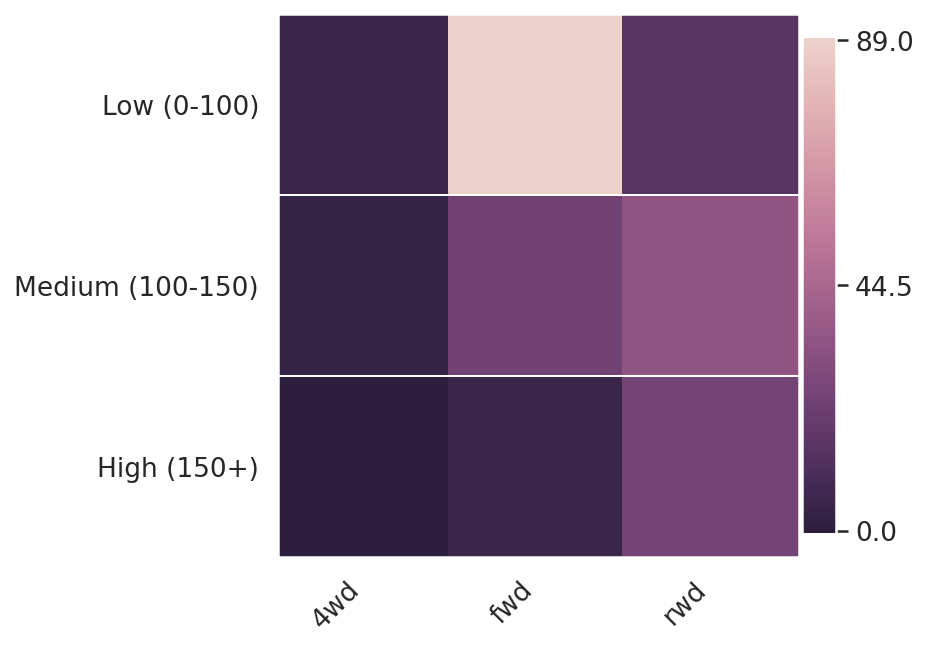

In [8]:
plt.figure(figsize=(5,5))

heatmap(
    x=g["drive-wheels"], # Column to use as horizontal dimension 
    y=g["horsepower-group"], # Column to use as vertical dimension
    size_scale=7900, # Change this to see how it affects the plot
    x_order=["4wd", "fwd", "rwd"], # Sort order for x labels
    y_order=bin_labels[::-1], # Sort order for y labels
    color=g["cnt"], # Values to map to color, here we use number of items in each bucket
    palette=sns.cubehelix_palette(128)[::-1] # We'll use black->red palette
)


Let's use the `size` parameter. It will enable us to map item counts (ie. distribution frequences) to size in order to help our eyes see the distribution more clearly.

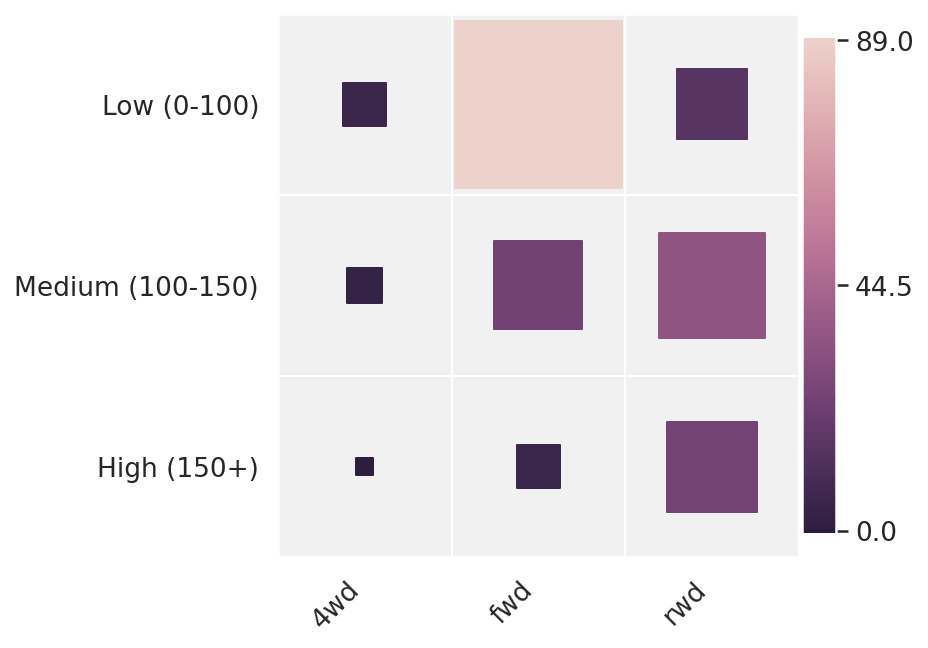

In [9]:
plt.figure(figsize=(5,5))

heatmap(
    x=g["drive-wheels"], # Column to use as horizontal dimension 
    y=g["horsepower-group"], # Column to use as vertical dimension
    
    size_scale=7000, # Change this to see how it affects the plot
    size=g["cnt"], # Values to map to size, here we use number of items in each bucket
    
    x_order=["4wd", "fwd", "rwd"], # Sort order for x labels
    y_order=bin_labels[::-1], # Sort order for y labels
    color=g["cnt"], # Values to map to color, here we use number of items in each bucket
    palette=sns.cubehelix_palette(128)[::-1] # We'll use black->red palette
)

Note that we used the same series for color and size, which is what we usually want to do.

Play with the code above and see what happens when you leave `color` and `palette` unspecified.

What happens if you use `palette=['orange']`?

Can you recreate the `corrplot` method used in the first example? (You can find the implementation at https://github.com/drazenz/heatmap/blob/master/heatmap/heatmap.py)